# __YÜKSEK DAYANIMLI BETON__

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option("display.float_format", "{:.3f}".format)
sns.set()

In [5]:
cc = pd.read_csv('concrete_clean.csv')

In [6]:
cc.head(3)

,Cement,Slag,FlyAsh,Water,SPs,CoarseAgg,FineAgg,WC,Day,Strength
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,0.300,28,79.986
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,0.300,28,61.887
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,0.686,90,40.270


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [12]:
Y = cc['Strength']
X = cc.drop(['Strength'], axis=1)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.transform(x_test)

In [30]:
k_range = np.arange(1, 32)
test_score = np.empty(len(k_range))

for i, k in enumerate(k_range):
    dtr = DecisionTreeRegressor(criterion = 'mse', min_samples_split = 2, max_depth = k, min_samples_leaf = 2)
    dtr.fit(x_train, y_train)
    test_score[i] = dtr.score(x_test, y_test)

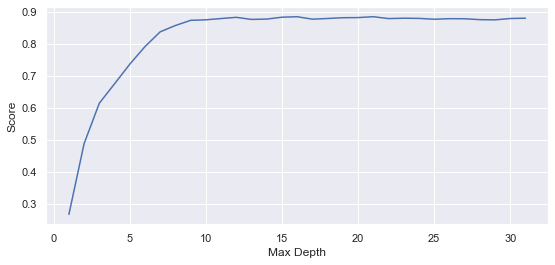

In [32]:
plt.figure(figsize=(9,4))
plt.plot(k_range, test_score)
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.show()

### Parametreler

In [21]:
dtr = DecisionTreeRegressor()
params = {'criterion': ['mse', 'mae'], 'min_samples_split': [2, 10, 30], 'max_depth': [2, 4, 8, 16, 32], 'min_samples_leaf': [2, 10, 30]}

In [22]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)
gridcv_results = GridSearchCV(estimator = dtr, param_grid = params, cv = k_fold).fit(X, Y)

In [23]:
gridcv_results.best_params_

{'criterion': 'mse',
 'max_depth': 32,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [29]:
pd.set_option("display.float_format", "{:.5f}".format)
grid_cv = pd.DataFrame(gridcv_results.cv_results_)
grid_cv = grid_cv[['mean_fit_time', 'param_criterion', 'param_min_samples_leaf', 'param_min_samples_split', 'param_max_depth', 'mean_test_score']]
grid_cv = grid_cv.sort_values(by='mean_test_score', ascending = False)
grid_cv.head(5)

,mean_fit_time,param_criterion,param_min_samples_leaf,param_min_samples_split,param_max_depth,mean_test_score
36,0.00660,mse,2,2,32,0.84513
27,0.00660,mse,2,2,16,0.84491
28,0.00600,mse,2,10,16,0.83865
37,0.00600,mse,2,10,32,0.83798
81,0.05596,mae,2,2,32,0.82788


# __BANKA KAMPANYASI__

In [33]:
bk = pd.read_csv('bank_clean.csv')

In [34]:
bk.head(3)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,4,1,0,0,1.10000,94.00000,-36.00000,5.00000,5191.00000,0,...,0,0,1,0,0,0,0,1,0,0
1,4,1,0,0,1.10000,94.00000,-36.00000,5.00000,5191.00000,0,...,0,0,1,0,0,0,0,1,0,0
2,2,1,0,0,1.10000,94.00000,-36.00000,5.00000,5191.00000,0,...,0,0,1,0,0,0,0,1,0,0


In [35]:
Y = bk['y_yes']
X = bk.drop(['y_yes'], axis=1)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.transform(x_test)

In [51]:
k_range = np.arange(1, 32)
test_score = np.empty(len(k_range))

for i, k in enumerate(k_range):
    dtr = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 32, max_depth = k, min_samples_leaf = 32)
    dtr.fit(x_train, y_train)
    test_score[i] = dtr.score(x_test, y_test)

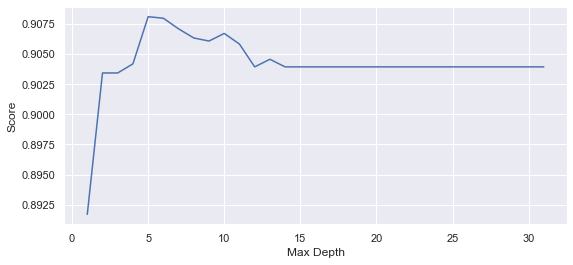

In [52]:
plt.figure(figsize=(9,4))
plt.plot(k_range, test_score)
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.show()

### Parametreler

In [48]:
dtc = DecisionTreeClassifier()
params = {'criterion': ['entropy', 'gini'], 'min_samples_split': [2, 8, 32], 'max_depth': [2, 4, 8, 16, 32], 'min_samples_leaf': [2, 8, 32]}

In [49]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)
gridcv_results = GridSearchCV(estimator = dtc, param_grid = params, cv = k_fold).fit(X, Y)

In [50]:
gridcv_results.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 32,
 'min_samples_split': 2}

In [54]:
pd.set_option("display.float_format", "{:.5f}".format)
grid_cv = pd.DataFrame(gridcv_results.cv_results_)
grid_cv = grid_cv[['mean_fit_time', 'param_criterion', 'param_min_samples_leaf', 'param_min_samples_split', 'param_max_depth', 'mean_test_score']]
grid_cv = grid_cv.sort_values(by='mean_test_score', ascending = False)
grid_cv.head(5)

,mean_fit_time,param_criterion,param_min_samples_leaf,param_min_samples_split,param_max_depth,mean_test_score
24,0.12352,entropy,32,2,8,0.90080
26,0.12692,entropy,32,32,8,0.90080
25,0.14231,entropy,32,8,8,0.90080
22,0.11593,entropy,8,8,8,0.90063
23,0.11873,entropy,8,32,8,0.90058


### Karşılaştırmlar

In [69]:
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [65]:
def modelFrame(X, Y, idx):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    
    standardscaler = StandardScaler()
    x_train = standardscaler.fit_transform(x_train)
    x_test = standardscaler.transform(x_test)
    
    k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)
    model = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 2, max_depth = 8, min_samples_leaf = 32).fit(x_train, y_train)

    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:,1]

    df = pd.Series({'accuracy': accuracy_score(y_test,y_pred),
                    'precision' :precision_score(y_test,y_pred),
                    'recall': recall_score(y_test,y_pred),
                    'f1-score': f1_score(y_test,y_pred),
                    'auc-roc': roc_auc_score(y_test, y_prob),
                    'cross-val': cross_val_score(estimator = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 2, max_depth = 8, min_samples_leaf = 32),
                                             X = X, y = Y, cv = k_fold).mean()}, name = idx)
    return df

In [68]:
dfModel = pd.DataFrame(columns = ['cross-val', 'accuracy', 'precision', 'recall', 'f1-score', 'auc-roc'])

Y = bk['y_yes']
X = bk.drop(['y_yes'], axis=1)
dfModel = dfModel.append(modelFrame(X, Y, 'dtc'))

x_smote, y_smote = SMOTE(random_state = 42).fit_sample(X, Y)
dfModel = dfModel.append(modelFrame(x_smote, y_smote, 'smote'))

dfModel

,cross-val,accuracy,precision,recall,f1-score,auc-roc
dtc,0.90080,0.90634,0.68125,0.25408,0.37012,0.80399
smote,0.75192,0.75002,0.82820,0.63042,0.71590,0.82880
